In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import squarify
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# References - Google search, Stack Overflow, Python Documentation, class slides

In [3]:
# Read all CSVs
action = pd.read_csv('action.csv')
adventure = pd.read_csv('adventure.csv')
crime = pd.read_csv('crime.csv')
family = pd.read_csv('family.csv')
fantasy = pd.read_csv('fantasy.csv')
film_noir = pd.read_csv('film-noir.csv')
history = pd.read_csv('history.csv')
horror = pd.read_csv('horror.csv')
mystery = pd.read_csv('mystery.csv')
scifi = pd.read_csv('scifi.csv')
sports = pd.read_csv('sports.csv')
thriller = pd.read_csv('thriller.csv')
war = pd.read_csv('war.csv')

In [4]:
# Concatenate all dataframes into one single dataframe
movies = pd.concat([action,adventure,crime,family,fantasy,film_noir,history,horror,mystery,
              scifi,sports,thriller,war]).drop_duplicates().reset_index(drop=True)

In [5]:
# Clean up the data
movies.drop(['movie_id', 'description', 'director_id', 'star_id', 'votes'], axis=1, inplace=True)
movies = movies.replace('\n','', regex=True)
movies = movies.dropna(subset=['rating'])
movies['runtime'] = movies['runtime'].str.replace(' min', '')
movies.rename(columns={'runtime':'runtime(in min)'}, inplace=True)
datatypes = movies.dtypes
datatypes

movie_name          object
year                object
certificate         object
runtime(in min)     object
genre               object
rating             float64
director            object
star                object
gross(in $)        float64
dtype: object

In [6]:
# Group all 2015 movies by genre and make pie chart
movies['genre_list'] = movies['genre'].str.split(', ')
movies_concat = pd.DataFrame(movies['genre_list'].tolist()).fillna('').add_prefix('genre_')
pie_chart = pd.concat([movies, movies_concat], axis=1)
pie_chart.drop(['genre_list'], axis=1, inplace=True)
movies_in_2015 = pie_chart.replace(r'^s*$', float('NaN'), regex = True)
movies_in_2015['year'].replace('  ', np.nan, inplace=True)
movies_in_2015['year'].replace('I', np.nan, inplace=True)
movies_in_2015['year'].replace('II', np.nan, inplace=True)
movies_in_2015['year'].replace('', np.nan, inplace=True)
movies_in_2015.dropna(subset = ['year'], inplace = True)
movies_in_2015["year"] = pd.to_numeric(movies_in_2015["year"])
movies_in_2015_clean = movies_in_2015[movies_in_2015.year == 2015]
movies_in_2015_clean.head()

,movie_name,year,certificate,runtime(in min),genre,rating,director,star,gross(in $),genre_0,genre_1,genre_2
72,Ant-Man,2015,PG-13,117,"Action, Comedy, Sci-Fi",7.3,Peyton Reed,"Paul Rudd, Michael Douglas, Corey Stoll, Evang...",180202163.0,Action,Adventure,Fantasy
87,Mad Max: Fury Road,2015,R,120,"Action, Adventure, Sci-Fi",8.1,George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",154058340.0,Action,Drama,Mystery
96,Sicario,2015,R,121,"Action, Crime, Drama",7.6,Denis Villeneuve,"Emily Blunt, Josh Brolin, Benicio Del Toro, Jo...",46889293.0,Action,Crime,Thriller
123,The Man from U.N.C.L.E.,2015,PG-13,116,"Action, Adventure, Comedy",7.2,Guy Ritchie,"Henry Cavill, Armie Hammer, Alicia Vikander, E...",45445109.0,Action,Adventure,Thriller
177,The Revenant,2015,R,156,"Action, Adventure, Drama",8.0,Alejandro G. Iñárritu,"Leonardo DiCaprio, Tom Hardy, Will Poulter, Do...",183637894.0,Animation,Action,Adventure


<Figure size 10000x6000 with 0 Axes>

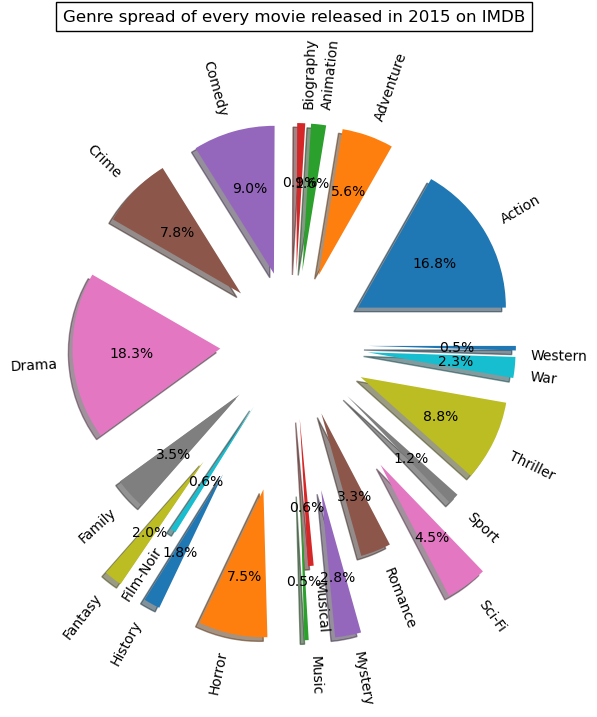

<Figure size 10000x6000 with 0 Axes>

In [7]:
count_0 = movies_in_2015_clean['genre_0'].value_counts().to_frame()
count_0.rename(columns={'index': 'genre', 'genre_0': 'count'}, inplace=True)
count_1 = movies_in_2015_clean['genre_1'].value_counts().to_frame()
count_1.rename(columns={'index': 'genre', 'genre_1': 'count'}, inplace=True)
count_2 = movies_in_2015_clean['genre_2'].value_counts().to_frame()
count_2.rename(columns={'index': 'genre', 'genre_2': 'count'}, inplace=True)
count_0 = count_0.astype({"count": float})
count_1 = count_1.astype({"count": float})
count_2 = count_2.astype({"count": float})
result = count_0.add(count_1, fill_value=0)
final_result = result.add(count_2, fill_value=0)
final_result.reset_index(inplace=True)
final_result.rename(columns={'index': 'genre'}, inplace=True)
final_result = final_result.replace(r'^\s*$', np.nan, regex=True)
final_result.dropna(inplace = True)
explode = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 1, 1, 
           1, 0.5, 1, 0.5, 1, 0.5, 0.5, 0.5, 0.5]
plt.pie(final_result['count'], labels = final_result['genre'], autopct='%1.1f%%', 
        rotatelabels=True, shadow=True, explode = explode)
plt.title("Genre spread of every movie released in 2015 on IMDB", bbox={'facecolor':'white', 'pad':5}, pad = 100)
plt.figure(figsize = (100,60))

Text(0.5, 1.0, 'Average IMDB Rating per Current MPA Film Certifications')

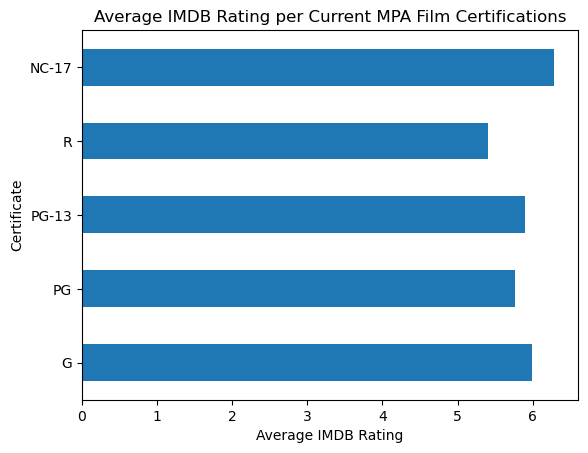

In [8]:
# Plot average IMDB ratings for each certification
certificate = movies['certificate'].replace('', np.nan, inplace=True)
certificate = movies.dropna(subset=['certificate'])
certificate_clean = certificate.groupby(['certificate'], as_index=False)['rating'].mean().round(2)
certifications = ['G','PG','PG-13','R','NC-17']
certificate_clean_final = certificate_clean[certificate_clean["certificate"].isin(certifications)]
z = certifications
certificate_clean_final= certificate_clean_final.iloc[pd.Categorical(certificate_clean_final.certificate,z).argsort()]
certificate_clean_final.plot.barh(x='certificate', y='rating', rot=0, legend=None);
plt.xlabel('Average IMDB Rating')
plt.ylabel('Certificate')
plt.title('Average IMDB Rating per Current MPA Film Certifications')

In [9]:
# Run linear regression to predict the rating based on the film's runtime
movies_by_runtime = movies.copy()                 
movies_by_runtime = movies_by_runtime.replace(r'^s*$', float('NaN'), regex = True)
movies_by_runtime['runtime(in min)'].replace(',','', regex=True, inplace=True)
movies_by_runtime.dropna(subset = ['runtime(in min)'], inplace = True)
movies_by_runtime['runtime(in min)'] = movies_by_runtime['runtime(in min)'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(movies_by_runtime[['runtime(in min)']], 
                                                    movies_by_runtime[['rating']], 
test_size=0.30, random_state=42)
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)
linearModel.score(x_test, y_test)

0.022519436836660578

In [10]:
y_predicted = linearModel.predict(x_test)
y_predicted

array([[5.95823369],
       [5.74778879],
       [5.7256367 ],
       ...,
       [5.57611006],
       [5.57057203],
       [6.09668428]])

In [11]:
predicted = pd.DataFrame(y_predicted, columns=['rating_predicted'])

In [12]:
combined = predicted.join([x_test.reset_index(drop=True),
y_test.reset_index(drop=True)])

In [13]:
melted = pd.melt(combined, id_vars=['runtime(in min)'], 
value_vars=['rating','rating_predicted'], 
var_name='rating_type',
value_name='rating_value')
melted.head()

,runtime(in min),rating_type,rating_value
0,130.0,rating,7.7
1,92.0,rating,4.5
2,88.0,rating,6.1
3,68.0,rating,6.1
4,84.0,rating,3.8


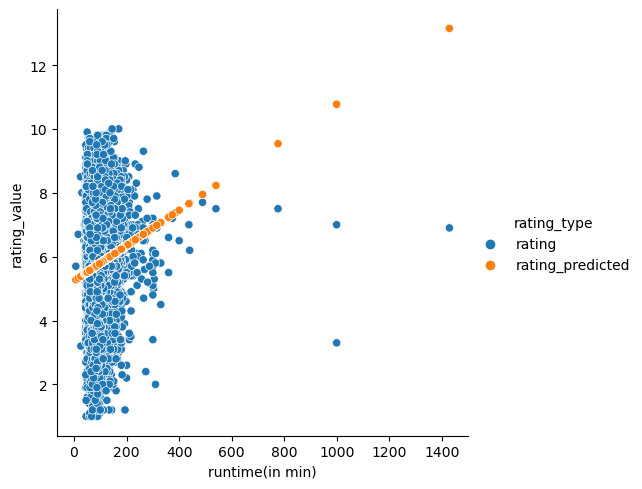

In [14]:
sns.relplot(data=melted, x='runtime(in min)', y='rating_value', 
hue='rating_type')

In [15]:
# Run multiple regression to predict the rating based on the film's runtime and gross(in $)
movies_by_runtime['runtime(in min)'] = movies_by_runtime['runtime(in min)'].astype(int)
movies_by_runtime['gross(in $)'].replace(',',np.nan, regex=True, inplace=True)
movies_by_runtime.dropna(subset = ['gross(in $)'], inplace = True)
movies_by_runtime['gross(in $)'] = movies_by_runtime['gross(in $)'].astype(int)
# movies_by_runtime
spielberg = movies_by_runtime[(movies_by_runtime.director == "Steven Spielberg")]
# split the training and test data 
x_train, x_test, y_train, y_test = train_test_split(spielberg[['runtime(in min)','gross(in $)']],
spielberg[['rating']], test_size=0.20, random_state=20)

In [16]:
# create the model and fit the training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
# score the testing data
model.score(x_test, y_test)

0.2867621554642572

In [18]:
# make the predictions
y_predicted = model.predict(x_test)
y_predicted

array([[7.2153126 ],
       [7.86310309],
       [7.51113193],
       [7.91844948],
       [7.82743581],
       [6.72133759],
       [6.80883447]])

In [29]:
# join the predicted data with the original data
predicted = pd.DataFrame(y_predicted, columns=['predictedRating'])
final = predicted.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
final.head()[['runtime(in min)','gross(in $)','rating','predictedRating']]

,runtime(in min),gross(in $),rating,predictedRating
0,116,234280354,6.5,7.215313
1,150,182207973,7.3,7.863103
2,142,119654823,6.8,7.511132
3,127,402453882,8.2,7.918449
4,164,47403685,7.5,7.827436


In [34]:
# calculate the residuals and store them in a column
final['residual'] = final.rating - final.predictedRating
final['% Change'] = (final.predictedRating - final.rating) / final.rating * 100
final.head()

,predictedRating,runtime(in min),gross(in $),rating,residual,% Change
0,7.215313,116,234280354,6.5,-0.715313,11.004809
1,7.863103,150,182207973,7.3,-0.563103,7.713741
2,7.511132,142,119654823,6.8,-0.711132,10.457823
3,7.918449,127,402453882,8.2,0.281551,-3.433543
4,7.827436,164,47403685,7.5,-0.327436,4.365811


In [35]:
final.loc[:, 'residual'].mean()
final.loc[:, '% Change'].mean()

5.794416667276392

<AxesSubplot:xlabel='residual', ylabel='Density'>

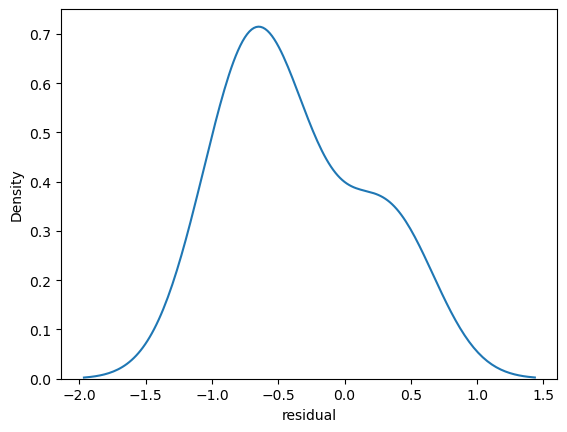

In [32]:
# create a KDE plot for the residuals
sns.kdeplot(data=final, x='residual')

Text(0.5, 1.0, 'IMDB Rating to Gross for Ratings 6.0 and Above')

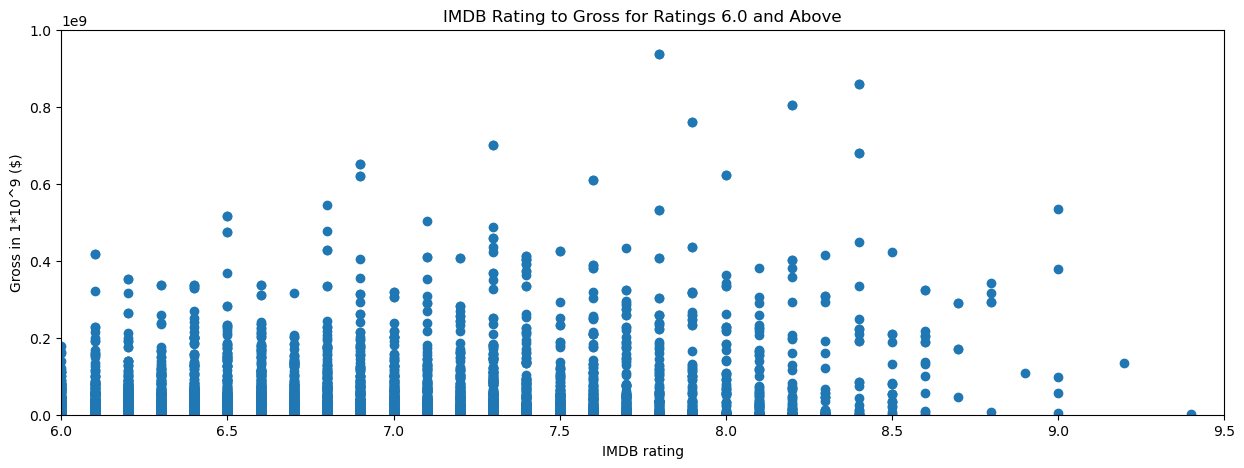

In [301]:
# See how well higher-rated films do at the box office 
gross_2 = movies.copy()   
movies_by_gross['gross(in $)'].replace(',',np.nan, regex=True, inplace=True)
movies_by_gross.dropna(subset = ['gross(in $)'], inplace = True)
plt.scatter(movies_by_gross['rating'], movies_by_gross['gross(in $)'])
plt.xlim(6, 9.5)
plt.ylim(0, 1000000000)
plt.xlabel('IMDB rating')
plt.ylabel('Gross in 1*10^9 ($)')
plt.title('IMDB Rating to Gross for Ratings 6.0 and Above')

Text(0.5, 1.0, '(Minimum 15 films directed & Rating at least 6.75)')

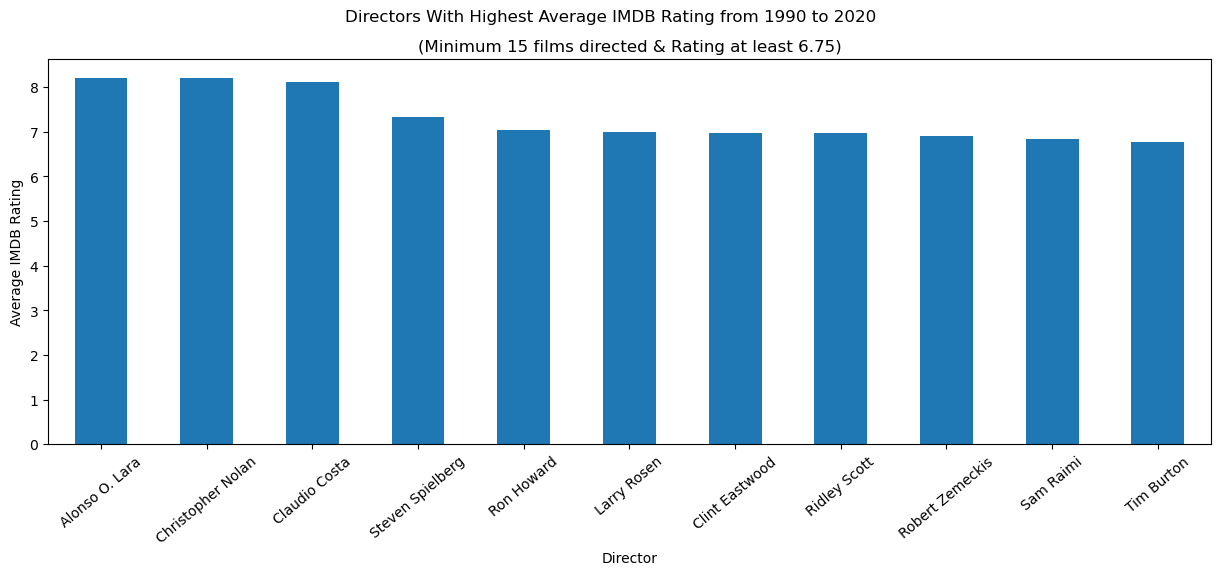

In [302]:
# See who are some of the best directors of the last 30 years
movies_since_1990 = movies.copy()                 
movies_since_1990 = movies_since_1990.replace(r'^s*$', float('NaN'), regex = True)
movies_since_1990['year'].replace('  ', np.nan, inplace=True)
movies_since_1990['year'].replace('I', np.nan, inplace=True)
movies_since_1990['year'].replace('II', np.nan, inplace=True)
movies_since_1990['year'].replace('', np.nan, inplace=True)
movies_since_1990.dropna(subset = ['year'], inplace = True)
movies_since_1990["year"] = pd.to_numeric(movies_since_1990["year"])
movies_since_1990_clean = movies_since_1990[(movies_since_1990.year >= 1990) & (movies_since_1990.year <= 2020)]
movies_since_1990_clean_final = movies_since_1990_clean.loc[movies_since_1990_clean.groupby('director')['director']
                                                            .transform('size').loc[lambda x: x >= 15].index]
directors = movies_since_1990_clean_final.groupby(['director'], as_index=False)['rating'].mean().round(2)
directors_sorted = directors.sort_values('rating', ascending=False)
directors_sorted_final = directors_sorted[directors_sorted.rating >= 6.75]
directors_sorted_final
plt.rcParams["figure.figsize"] = (15, 5)
directors_sorted_final.plot.bar(x='director', y='rating', rot=40, legend=None);
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.suptitle('Directors With Highest Average IMDB Rating from 1990 to 2020')
plt.title('(Minimum 15 films directed & Rating at least 6.75)')
